In [8]:
from IPython.display import Image 

# what are the types of logistic regression 

- Binary 
- Multi-linear functions failsClass (eg. Cats or Dogs)

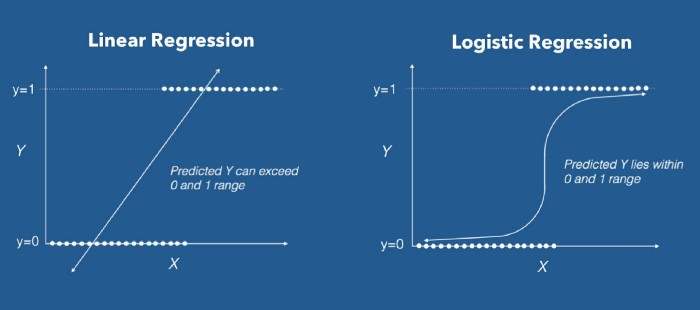

In [9]:
Image('./img/linearVslogistic.jpeg')

- Logistic Regression is a Machine Learning algorithm which is used for the classification problem

>  Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function

> cost function can be defined as the `'Sigmoid function’` 

### The hypothesis of logistic regression tends it to limit the cost function between 0 and 1

$ 0 <= h_{\theta}(x) <= 1 $

### What is the Sigmoid Fuction? 

- In order to map predicted values to probabilities
- The function maps any real value into another value between 0 and 1. 
- In machine learning, we use sigmoid to map predictions to probabilities

 # sigmoid Function : $ \sigma(z) = \frac{1}{1 + e^{-x}}$

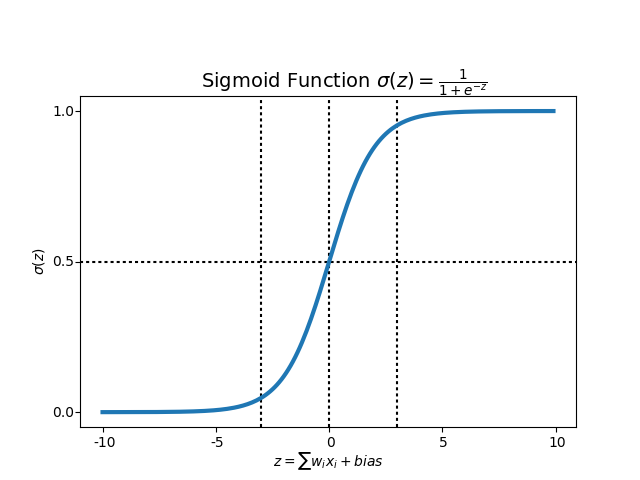

In [10]:
Image('./img/sigmoid.png')

## Hypothesis Representaion 

- In Linear regression 
    - $h\theta(x) = \beta_0 + \beta_1{X}$

- logistic regression 
    - $\sigma(Z) = \sigma(\beta_0 + \beta_1{X})$
    - our hypothesis will give values between 0 and 1

## $ h\theta(x)= \frac{1}{1 + e^{-(\beta_0 + \beta_1{X})}}$

## Decision Boundary


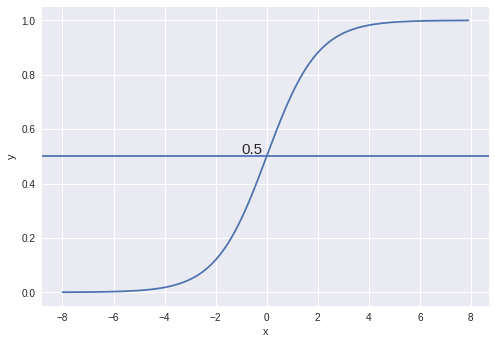

In [11]:
Image('./img/decision_bound.png')

- our classifier to give us a set of outputs or classes based on probability

- when we pass the inputs through a prediction function and

- returns a probability score between 0 and 1.

## cost function 

- cost funxtino represents optimization objective 
- create cost function and minimize it so we can develop an accurate model with minimum error 

- when using linear regression cost function : J(theta) = 1/2(sum(y_hat - y))

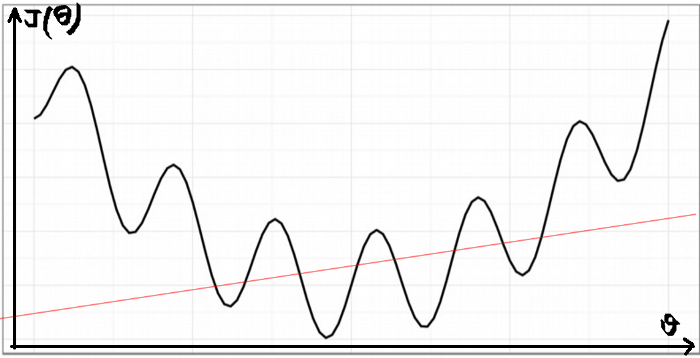

In [14]:
Image('./img/cost_funtion(linear_on_log).png')

- non convex function with many local minimums 
- very difficult to minimize the cost value and find the global minimum

## Logistic regression, Cost function is defined

## $ cost(h_\theta(x), y) = -log(h_\theta(x)) $ if y = 1

## $ cost(h_\theta(x), y) = -log(1 - h_\theta(x)) $ if y = 0 


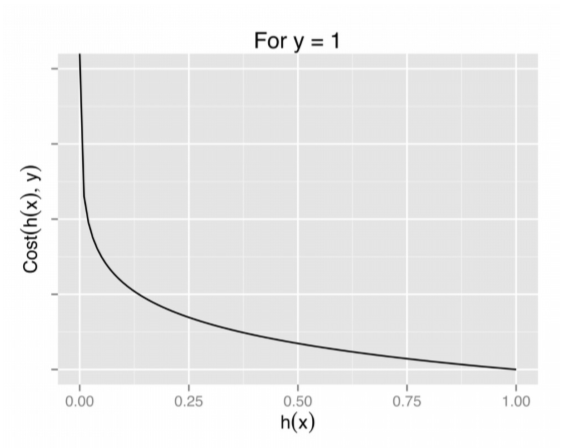

In [21]:
Image('./img/graphOfLogistic.png')

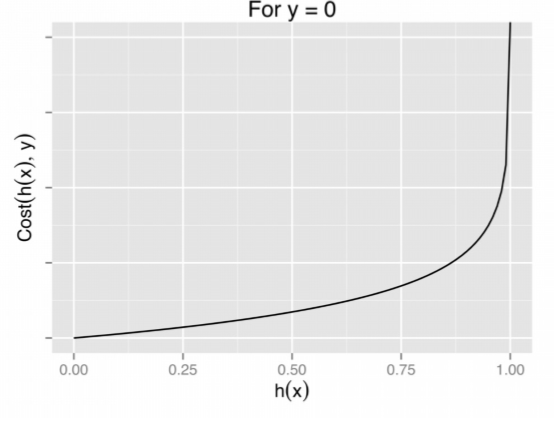

In [20]:
Image('./img/graphOfLogistic1.png')

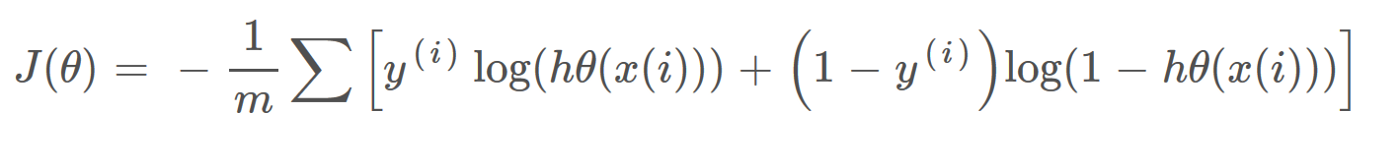

In [22]:
#  two functions can be compressed into a single function 
Image('./img/logisticOneCost.png')

## Gradient Descent

- How do we reduce the cost value. Well, this can be done by using Gradient Descent 

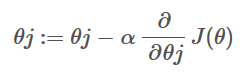

In [23]:
Image('./img/logistic_gradien.png')

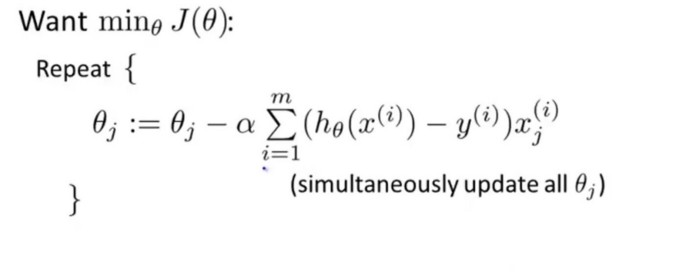

In [26]:
Image('./img/logistic_gradient1.jpeg')

# code 

- One vs All

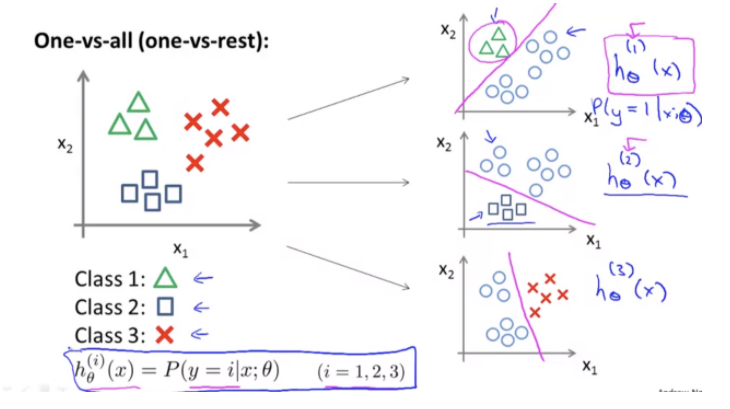

In [43]:
Image('./img/one_vs_all.png')

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

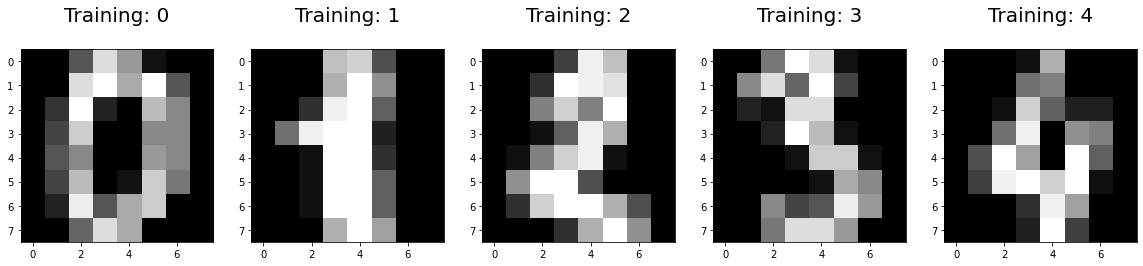

In [29]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

- penalty : 규제에 사용 된 기준을 지정 (l1, l2, elasticnet, none) – default : l2
- dual : 이중 또는 초기 공식
- tol : 정밀도
- C : 규제 강도
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- intercept_scaling : 정규화 효과 정도
- class_weight : 클래스의 가중치
- random_state : 난수 seed 설정
- solver : 최적화 문제에 사용하는 알고리즘
- max_iter : 계산에 사용할 작업 수
- multi_class : 다중 분류 시에 (ovr, multinomial, auto)로 설정
- verbose : 동작 과정에 대한 출력 메시지
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- n_jobs : 병렬 처리 할 때 사용되는 CPU 코어 수
- l1_ratio : L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용)

In [31]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/Users/codefreak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [33]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [36]:
predictions = logisticRegr.predict(x_test)

In [37]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


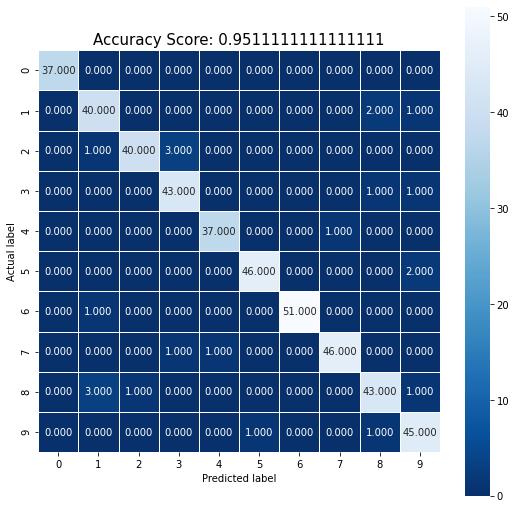

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# raw code 

In [58]:
# binary 
# https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17
from numpy import log, dot, e
from numpy.random import rand

class LogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights)) 
            
        self.weights = weights
        self.loss = loss
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_test - logistic.predict(x_test)

<ipython-input-58-a8866930f36d>:13: RuntimeWarning: divide by zero encountered in log
  predict_0 = (1 - y) * log(1 - self.sigmoid(z))
<ipython-input-58-a8866930f36d>:13: RuntimeWarning: invalid value encountered in multiply
  predict_0 = (1 - y) * log(1 - self.sigmoid(z))


array([ 1,  7,  1,  5,  5,  6,  0,  8,  7,  4,  1,  7,  5,  5,  5,  5,  0,
       -1,  4,  7,  7,  6,  7,  3,  6,  4,  3,  8,  1,  8,  3,  6,  5,  7,
        8,  3,  2,  0, -1,  0,  7,  5,  6,  6,  0, -1,  6,  5,  1,  0,  8,
        5,  6,  8, -1, -1,  4,  0,  5,  2, -1,  1,  2,  3,  0,  8,  1,  5,
        8,  0,  7,  2,  4,  0,  1,  7,  1,  1,  8,  6,  1,  2,  5, -1,  4,
        2,  6,  4,  0,  1,  8,  8,  2,  0,  6,  6,  3,  7,  4,  7,  4,  4,
        1,  4,  8, -1,  6,  0,  3,  6,  2,  3,  7,  8,  6,  8,  7,  1,  5,
        4,  1,  4,  7,  3,  7,  6, -1,  5,  0,  4,  8,  8,  8,  4,  8,  8,
        4,  6,  4,  5,  1,  7,  5,  8,  5,  0,  4,  0,  4,  8,  8,  0,  4,
        2,  5,  0,  7,  8,  7,  6,  5,  6,  5,  4,  5, -1,  7,  7,  8,  7,
        5,  0, -1,  3,  0,  5,  2,  7,  5,  6,  3,  4,  5,  2, -1,  2,  2,
        2, -1,  6,  6,  4,  6,  7, -1,  6,  7,  8,  5,  3,  4, -1,  0,  3,
        5,  3,  2,  2, -1,  8,  4,  8,  1,  0,  3,  1,  0,  5,  7,  8,  1,
        3,  8,  2,  6,  5

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,

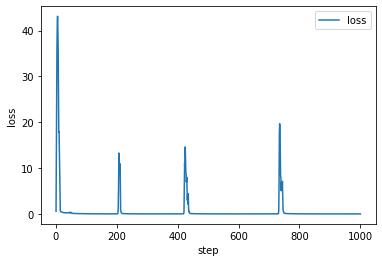

In [59]:
# multi model
# https://towardsdatascience.com/multiclass-logistic-regression-from-scratch-9cc0007da372
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.datasets import load_iris

def loss(X, Y, W):
    """
    Y: onehot encoded
    """
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    """
    Y: onehot encoded 
    """
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    """
    Very basic gradient descent algorithm with fixed eta and mu
    """
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    
X = load_iris().data
Y = load_iris().target

# fit model
model = Multiclass()
model.fit(x_train, y_train)

# plot loss
model.loss_plot()

# predict 
model.predict(x_test)

# check the predicted value and the actual value
model.predict(x_test) == y_test